In [1]:
import glob
import numpy as np
import pandas as pd
from natsort import natsorted
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Load result

In [2]:
def load_loss(path): 
    files = glob.glob(path)
    files = natsorted(files)
    dfs_split = []
    for file in files: 
        df = pd.read_csv(file, index_col=[0,1], header=[0,1])
        dfs_split.append(df)
    
    return dfs_split

In [11]:
trial_name = 'trial44'
model = 'catboost'
path = '../results/gefcom2014-solar/'+trial_name+'/dfs_loss_valid/*'+model+'*.csv'
dfs_loss_valid = load_loss(path)

## Competition benchmark

In [12]:
loss_mean_valid = [df.mean().mean() for df in dfs_loss_valid]

In [13]:
df_scores = pd.read_excel('../data/gefcom2014/gefcom2014-scores.xlsx', index_col=0, header=0, sheet_name='Solar')
df_scores.loc['Solar trial',:] = loss_mean_valid
df_scores.loc[:,'Overall'] = df_scores.iloc[:, 4:].mean(axis=1)

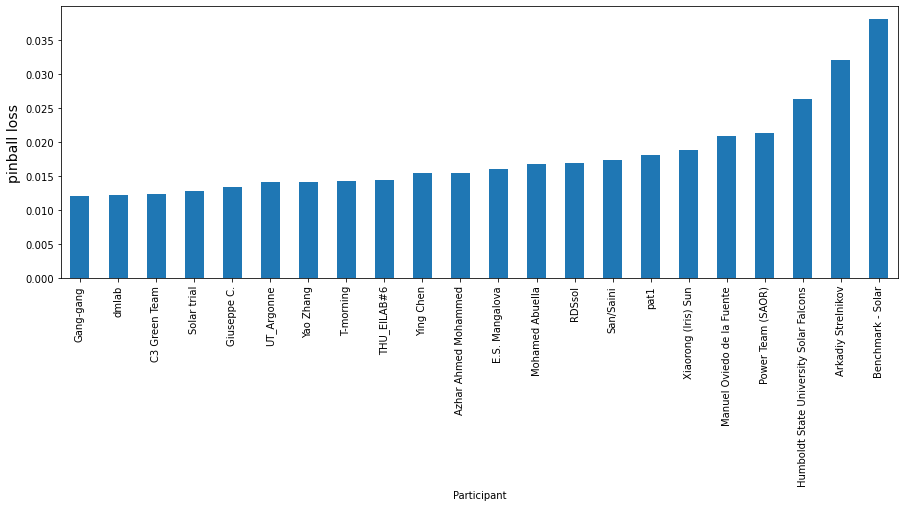

In [14]:
ax = df_scores['Overall'].sort_values().plot.bar(figsize=(15,5))
ax.set_ylabel('pinball loss', fontsize=14);

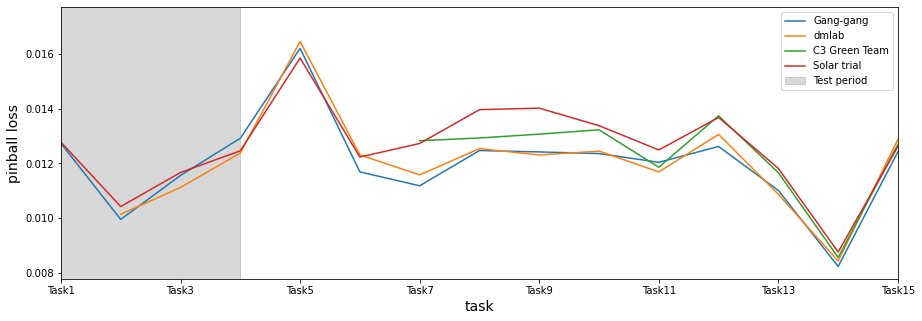

In [15]:
fig, ax = plt.subplots(figsize=(15,5))
df_scores.loc['Gang-gang',:][:-1].plot(ax=ax)
df_scores.loc['dmlab',:][:-1].plot(ax=ax)
df_scores.loc['C3 Green Team',:][:-1].plot(ax=ax)
ylim = ax.get_ylim()
df_area = pd.DataFrame(data=np.repeat(ylim[1], 4), index=df_scores.columns[:4], columns=['Test period'])
df_area.plot.area(ax=ax, color='grey', alpha=0.3)
df_scores.loc['Solar trial',:][:-1].plot(ax=ax)
ax.set_ylim(ylim[0], ylim[1])
ax.set_xlabel('task', fontsize=14)
ax.set_ylabel('pinball loss', fontsize=14)
ax.legend()

## Pinball loss as function of quantiles

In [16]:
def plot_scatters(dfs_loss_valid):
    fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(15,15), sharex=True, sharey=True)
    ax = ax.flatten()
    for split in range(len(dfs_loss_valid)): 
        df = dfs_loss_valid[split].mean().unstack().T
        df.index = [float(index[8:]) for index in df.index]
        df = df.reindex(sorted(df.index), axis=0)
        df.plot(ax=ax[split])
        ax[split].set_title('Split: {0}'.format(split))
        if split==0: ax[split].legend()

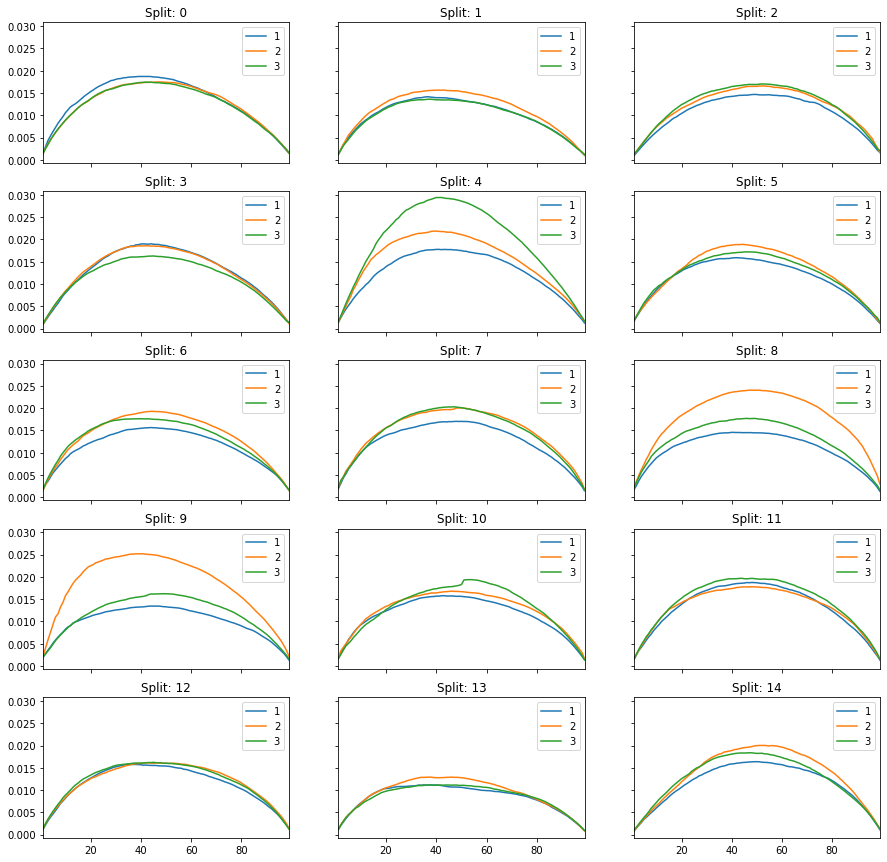

In [17]:
plot_scatters(dfs_loss_valid)